### Using Pandas together with SQL

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
# Install the SQLAlchemy library if it is not installed
# !sudo -H pip3 install -U sqlalchemy

### Importing into DataFrames using read_sql

The `read_sql` function of Pandas allows us to create a dataframe directly from a SQL query. To execute the query, we first setup the connection to the database using the SQLAlchemy library.

In [3]:
from sqlalchemy import create_engine

In [4]:
conn_string_imdb = 'mysql://{user}:{password}@{host}:{port}/{db}?charset=utf8'.format(
    user='student', 
    password='dwdstudent2015', 
    host = 'db.ipeirotis.org', 
    port=3306, 
    db='imdb',
    encoding = 'utf-8'
)
engine_imdb = create_engine(conn_string_imdb)

#### Retrieve the first 10 lines from the actors table 

In [5]:
query = '''
SELECT * FROM actors LIMIT 10
'''

In [6]:
df_actors = pd.read_sql(query, con=engine_imdb)

In [7]:
df_actors

,id,first_name,last_name,gender
0,2,Michael,'babeepower' Viera,M
1,3,Eloy,'Chincheta',M
2,4,Dieguito,'El Cigala',M
3,5,Antonio,'El de Chipiona',M
4,6,José,'El Francés',M
5,7,Félix,'El Gato',M
6,8,Marcial,'El Jalisco',M
7,9,José,'El Morito',M
8,10,Francisco,'El Niño de la Manola',M
9,11,Víctor,'El Payaso',M


#### Retrieve the number of movies per year

In [8]:
query = '''
SELECT year, COUNT(*) AS num_movies, COUNT(rank) AS rated_movies
FROM movies 
GROUP BY year
ORDER BY year
'''

In [9]:
df_movies = pd.read_sql(query, con=engine_imdb)

In [10]:
df_movies

,year,num_movies,rated_movies
0,1888,2,0
1,1890,3,1
2,1891,6,6
3,1892,9,9
4,1893,2,1
5,1894,59,18
6,1895,72,34
7,1896,410,43
8,1897,688,66
9,1898,1004,79


Let's try to plot the results.

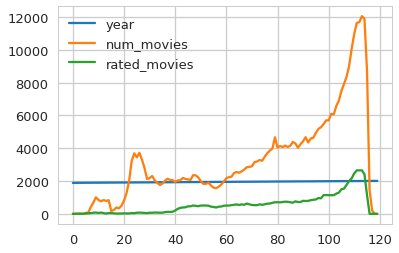

In [11]:
# The plot() command takes the index (the first "column") of the dataframe
# and makes that the x-axis.
# Then it plots *ALL* the numeric columns as a line
df_movies.plot()

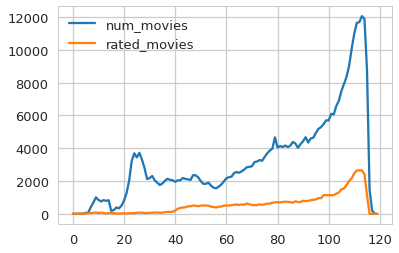

In [12]:
# First step: We can eliminate the "year" line by selecting 
# the columns that we want to plot
# To select columns, we pass a list of the column names that
# we want to keep in square brackets
df_movies[ ["num_movies", "rated_movies"] ].plot() 
# still the x-axis does not list the year

We have a couple of issues. We also plotted the year as a line, and we do not have it as the label of the x-axis. For that, we need to convert the year into a proper datetime variable, and then make it the index for the dataframe.

In [13]:
# We are going to make the "year" column to be the index

# We first convert the column into the right datatype (datetime)
df_movies['year'] = pd.to_datetime(df_movies['year'], format='%Y')
# And now we specify that the (converted) year column should be the index
# The set_index command does not modify the dataframe itself, but rather
# it returns a new dataframe with the new index. That's why we save the 
# result in df_movies2
df_movies2 = df_movies.set_index('year')
df_movies2

,num_movies,rated_movies
year,,
1888-01-01,2,0
1890-01-01,3,1
1891-01-01,6,6
1892-01-01,9,9
1893-01-01,2,1
1894-01-01,59,18
1895-01-01,72,34
1896-01-01,410,43
1897-01-01,688,66


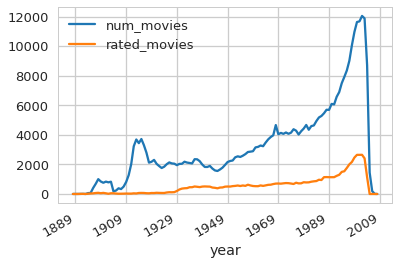

In [14]:
df_movies2.plot()

### Exercise

* Connect to the Facebook database, and use the `MemberSince` variable from the `Profiles` table to plot the growth of Facebook users. Use the following information:
>    user='student', 
>    password='dwdstudent2015', 
>    host = 'db.ipeirotis.org', 
>    port=3306, 
>    db='facebook'
* (_Learn something new_) Use the [cumsum()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.cumsum.html) function of Pandas and plot the total number of registered users over time.

MemberSince    datetime64[ns]
cnt                     int64
dtype: object

### Further Examples with SQL and Pandas

Now let's run a query to get the political views of Facebook users, broken down by gender.

In [16]:
conn_string_fb = 'mysql://{user}:{password}@{host}:{port}/{db}'.format(
    user='student', 
    password='dwdstudent2015', 
    host = 'db.ipeirotis.org', 
    port=3306, 
    db='facebook'
)
engine_fb = create_engine(conn_string_fb)

In [17]:
polviews_by_gender = '''
SELECT Sex, PoliticalViews, COUNT(*) AS cnt 
FROM Profiles 
WHERE Sex IS NOT NULL AND PoliticalViews IS NOT NULL 
GROUP BY Sex, PoliticalViews
ORDER BY  PoliticalViews, Sex
'''

And let's get the dataframe:

In [18]:
df = pd.read_sql(polviews_by_gender, con=engine_fb)
df

,Sex,PoliticalViews,cnt
0,Female,Apathetic,309
1,Male,Apathetic,462
2,Female,Conservative,428
3,Male,Conservative,474
4,Female,Liberal,4054
5,Male,Liberal,2196
6,Female,Libertarian,113
7,Male,Libertarian,196
8,Female,Moderate,1444
9,Male,Moderate,1379


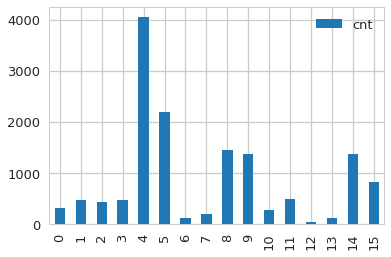

In [19]:
# Let's plot this!
# Bleh, this is really fugly...
# Remember that the index of the dataframe becomes the default x-axis
df.plot(kind='bar')

In [20]:
# Pivot, baby!
# Now the index contains the Political Views, which will be our x-axis
dfp = df.pivot_table(index='PoliticalViews', columns='Sex', values='cnt')
dfp

Sex,Female,Male
PoliticalViews,,
Apathetic,309,462
Conservative,428,474
Liberal,4054,2196
Libertarian,113,196
Moderate,1444,1379
Other,280,482
Very Conservative,38,107
Very Liberal,1362,813


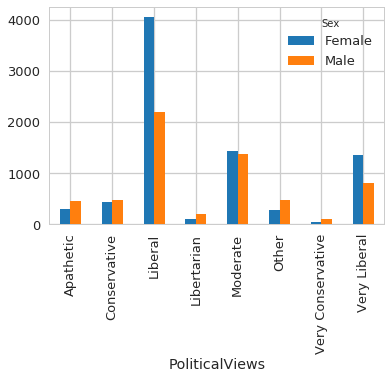

In [21]:
dfp.plot(kind='bar')

In [22]:
dfp.sum() # sums across the rows

Sex
Female    8028
Male      6109
dtype: int64

In [23]:
dfp.sum(axis=1) # this one sums across the columns (axis=1)

PoliticalViews
Apathetic             771
Conservative          902
Liberal              6250
Libertarian           309
Moderate             2823
Other                 762
Very Conservative     145
Very Liberal         2175
dtype: int64

In [24]:
# Let's normalize the columns, as we have more females than males, and it seems that there are always more women
dfp = dfp / dfp.sum()
dfp

Sex,Female,Male
PoliticalViews,,
Apathetic,0.038490,0.075626
Conservative,0.053313,0.077590
Liberal,0.504983,0.359470
Libertarian,0.014076,0.032084
Moderate,0.179870,0.225733
Other,0.034878,0.078900
Very Conservative,0.004733,0.017515
Very Liberal,0.169656,0.133082


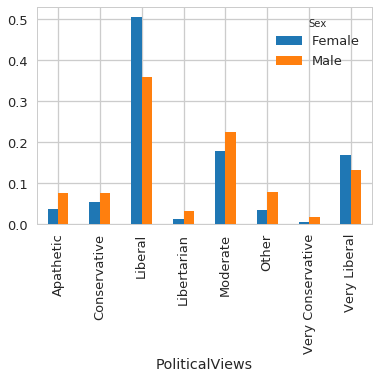

In [25]:
dfp.plot(kind='bar')

In [26]:
# OK, now let's try to re-order the list of results
# according to the logical structure
neworder = ['Very Liberal', 'Liberal', 'Moderate', 'Conservative', 'Very Conservative', 'Libertarian', 'Apathetic', 'Other']
newindex = sorted(dfp.index, key=lambda x: neworder.index(x))
dfp = dfp.reindex(newindex)
dfp

Sex,Female,Male
PoliticalViews,,
Very Liberal,0.169656,0.133082
Liberal,0.504983,0.359470
Moderate,0.179870,0.225733
Conservative,0.053313,0.077590
Very Conservative,0.004733,0.017515
Libertarian,0.014076,0.032084
Apathetic,0.038490,0.075626
Other,0.034878,0.078900


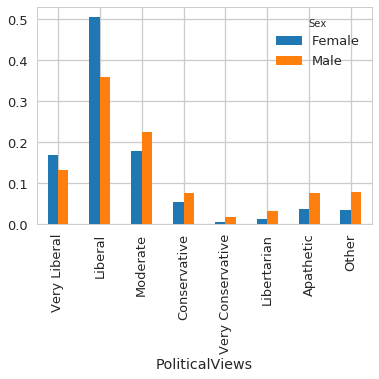

In [27]:
dfp.plot(kind='bar')

### Facebook, Favorite Books, and Political views

In [28]:
books = '''
SELECT B.Book, P.PoliticalViews, COUNT(*) AS cnt 
FROM Profiles P JOIN FavoriteBooks B ON B.ProfileID = P.ProfileId  
WHERE PoliticalViews IS NOT NULL AND B.Book IS NOT NULL 
      AND (PoliticalViews = 'Liberal' OR PoliticalViews = 'Conservative')
GROUP BY B.Book, P.PoliticalViews
HAVING cnt > 3
'''

In [29]:
df_books = pd.read_sql(books, con=engine_fb)
df_books.head(10)

,Book,PoliticalViews,cnt
0,100 Years Of Solitude,Liberal,55
1,1984,Conservative,32
2,1984,Liberal,286
3,1984 By George Orwell,Liberal,4
4,1984 George Orwell,Liberal,5
5,1984 Orwell,Liberal,6
6,4,Liberal,4
7,4 Blondes,Liberal,5
8,5,Liberal,4
9,5 People You Meet In Heaven,Liberal,7


In [30]:
polviews = '''
SELECT PoliticalViews, COUNT(*) AS cnt 
FROM facebook.Profiles
GROUP BY PoliticalViews
'''

In [31]:
df_polviews = pd.read_sql(polviews, con=engine_fb)
df_polviews

,PoliticalViews,cnt
0,None,11091
1,Apathetic,805
2,Conservative,936
3,Liberal,6461
4,Libertarian,325
5,Moderate,2898
6,Other,824
7,Very Conservative,167
8,Very Liberal,2277


In [32]:
dfp = df_books.pivot_table(index='Book', columns='PoliticalViews', values='cnt')
dfp.head(10)

PoliticalViews,Conservative,Liberal
Book,,
100 Years Of Solitude,NaN,55.0
1984,32.0,286.0
1984 By George Orwell,NaN,4.0
1984 George Orwell,NaN,5.0
1984 Orwell,NaN,6.0
4,NaN,4.0
4 Blondes,NaN,5.0
5,NaN,4.0
5 People You Meet In Heaven,NaN,7.0


In [33]:
dfp["Liberal_perc"] = dfp["Liberal"]  / 6461
dfp["Conservative_perc"] = dfp["Conservative"]  / 936

In [34]:
dfp["Liberal_To_Conservative"] =  dfp["Liberal_perc"] / dfp["Conservative_perc"] 
dfp["Conservative_To_Liberal"] = dfp["Conservative_perc"]  / dfp["Liberal_perc"] 

In [35]:
liberal_books = dfp[["Liberal_To_Conservative"]].sort_values("Liberal_To_Conservative", ascending=False).head(10)
liberal_books

PoliticalViews,Liberal_To_Conservative
Book,
On The Road,4.925553
Me Talk Pretty One Day,4.382294
The Bell Jar,3.245070
The Perks Of Being A Wallflower,2.723541
Franny And Zooey,2.498994
Life Of Pi,2.346881
The Giver,2.276516
The Lovely Bones,2.245473
Lolita,2.086117


In [36]:
conservative_books = dfp[["Conservative_To_Liberal"]].sort_values("Conservative_To_Liberal", ascending=False).head(10)
conservative_books

PoliticalViews,Conservative_To_Liberal
Book,
Liar S Poker,24.850000
Bible,9.861111
Mere Christianity,8.283333
Monkey Business,7.888889
C S Lewis,6.902778
The Bible,5.798333
The Illiad,5.522222
Moneyball,4.141667
The Prince,3.865556


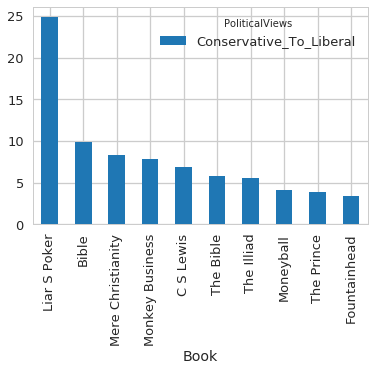

In [37]:
conservative_books.plot(kind='bar')

### Inserting Data in a Database using Pandas

In [ ]:
# Read the CSV file
restaurants = pd.read_csv('data/restaurant.csv.gz', encoding="utf-8", dtype="unicode")

In [ ]:
# Usual bookkeeping regarding datatypes
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)

In [ ]:
# Connect to the MySQL, but without selecting a database
conn_string = 'mysql://{user}:{password}@{host}:{port}/?charset=utf8'.format(
    user='root', 
    password='dwdstudent2015', 
    host = 'localhost', 
    port=3306, 
    encoding='utf-8'
)
engine = create_engine(conn_string)

In [ ]:
# Create the database where we want to store the data
# Do not worry about the Warning if the database already exists
engine.execute('CREATE DATABASE IF NOT EXISTS nyc_restaurant_inspections')
engine.execute('USE nyc_restaurant_inspections')

In [ ]:
# We drop the table if it is already there
engine.execute('DROP TABLE IF EXISTS inspections')
# Store the dataframe as a SQL table, using the to_sql command
restaurants.to_sql(name='inspections', # name the table "inspections"
                   con=engine, # use the connection to MySQL created earlier
                   if_exists='replace', # if the table is already there, replace it
                   index=False, # do not write the index column in the database
                   chunksize=1000 # write 1000 lines at a time)
                  )

In [ ]:
# And then we can just retrieve it from the database
df = pd.read_sql("SELECT * FROM inspections LIMIT 100", con=engine)
df.head(100)